<a href="https://colab.research.google.com/github/sanjanasrimanjunath/Gold_price_prediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print top 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

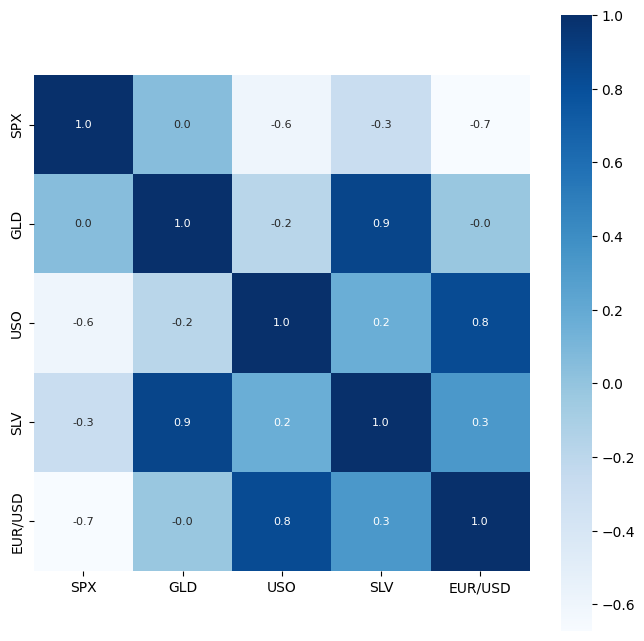

In [ ]:
#analysing correlation
correlation = gold_data.drop('Date', axis=1).corr()
print(correlation)

#construct a heatmap to understand the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation,cbar = True, square=True, annot=True,fmt='.1f',annot_kws={'size':8}, cmap='Blues')
#


In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1384357783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

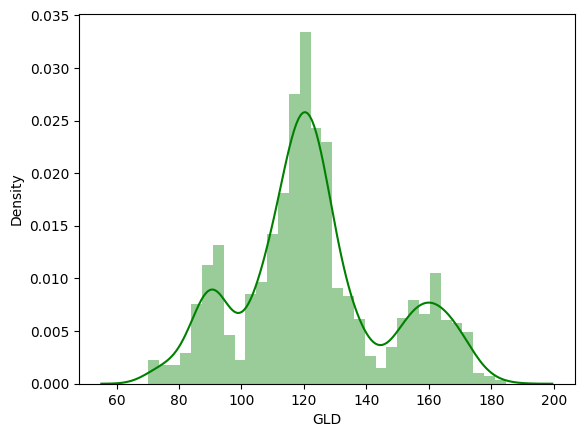

In [ ]:
#checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)


RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.7065996   81.87299972 116.21240024 127.65390036 120.66860134
 154.61829803 150.27779928 126.06850015 117.43679881 125.9661007
 116.42730129 171.98770114 141.62849875 168.14119861 115.2831
 117.56510053 139.4995027  170.1593015  160.0564027  158.23989998
 155.1275001  125.34680042 176.70269954 157.49770371 125.25650035
  93.81020013  77.5165001  120.73009994 119.12689947 167.50839983
  88.39030021 125.33029997  91.11520106 117.60450041 121.09119916
 135.88770072 115.8972011  115.1561006  149.38650031 107.02160076
 103.91200239  87.17359793 126.62090065 118.03680001 152.685499
 119.86559971 108.31560001 107.93089865  93.27680107 127.06399764
  75.35280016 113.60209893 121.18180002 111.28489938 118.77779888
 121.05289934 159.14629922 167.34210142 147.01899687  85.7550985
  94.35440039  86.73689848  90.57220031 118.90740072 126.51850029
 127.72760033 168.88919931 122.2869992  117.26669922  98.61320059
 168.34630187 142.87429873 131.72210265 121.29210214 121.18069936
 119.62570048 114.

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.989018489315845


Compare the actual values and predict values in a plot

In [ ]:
Y_test = list(Y_test)

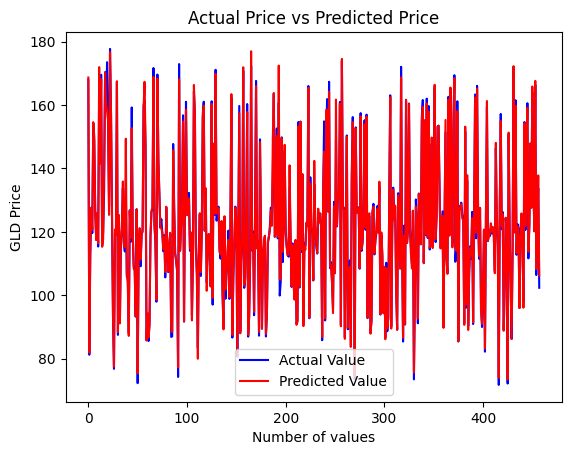

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# Get input from the user
spx_input = float(input("Enter SPX value (between 676.53 and 2872.87): "))
uso_input = float(input("Enter USO value (between 7.96 and 117.48): "))
slv_input = float(input("Enter SLV value (between 8.85 and 47.26): "))
eurusd_input = float(input("Enter EUR/USD value (between 1.04 and 1.60): "))

# Create a pandas DataFrame from the input
input_data = pd.DataFrame({
    'SPX': [spx_input],
    'USO': [uso_input],
    'SLV': [slv_input],
    'EUR/USD': [eurusd_input]
})

# Predict the GLD price
predicted_gld_price = regressor.predict(input_data)

# Print the predicted price
print("Predicted GLD Price:", predicted_gld_price[0])

Enter SPX value (between 676.53 and 2872.87): 698
Enter USO value (between 7.96 and 117.48): 8
Enter SLV value (between 8.85 and 47.26): 45
Enter EUR/USD value (between 1.04 and 1.60): 1.5
Predicted GLD Price: 183.0083961400001


Saving the trained model

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))